In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.feature_selection import RFE

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.columns

Index(['VEC mean', 'APE mean', 'Electronegativity local mismatch',
       'Shear modulus delta', 'Shear modulus mean', 'Mixing enthalpy',
       'Shear modulus strength model', 'Nb', 'Mo', 'Radii gamma', 'Yang omega',
       'Electronegativity delta', 'Lambda entropy', 'Ta',
       'Shear modulus local mismatch', 'Configuration entropy', 'Yang delta',
       'W', 'Radii local mismatch', 'Mean cohesive energy', 'Total weight',
       'Atomic weight mean', 'SFE'],
      dtype='object')

In [4]:
data_fit = data.drop(['Nb', 'Mo', 'Radii gamma', 'Yang omega',
       'Electronegativity delta', 'Lambda entropy', 'Ta',
       'Shear modulus local mismatch', 'Configuration entropy', 'Yang delta',
       'W', 'Radii local mismatch', 'Mean cohesive energy', 'Total weight',
       'Atomic weight mean'], axis=1)

In [6]:
data_fit.columns

Index(['VEC mean', 'APE mean', 'Electronegativity local mismatch',
       'Shear modulus delta', 'Shear modulus mean', 'Mixing enthalpy',
       'Shear modulus strength model', 'SFE'],
      dtype='object')

In [7]:
data_fit.corr()

,VEC mean,APE mean,Electronegativity local mismatch,Shear modulus delta,Shear modulus mean,Mixing enthalpy,Shear modulus strength model,SFE
VEC mean,1.000000,0.195874,0.245593,-0.651333,0.928741,0.083173,0.394928,0.011586
APE mean,0.195874,1.000000,-0.579551,-0.312989,0.105377,-0.605110,0.403100,-0.330561
Electronegativity local mismatch,0.245593,-0.579551,1.000000,0.210638,0.285092,0.963831,-0.466039,0.421673
Shear modulus delta,-0.651333,-0.312989,0.210638,1.000000,-0.699804,0.418289,-0.925722,0.107551
Shear modulus mean,0.928741,0.105377,0.285092,-0.699804,1.000000,0.122868,0.428528,0.039564
Mixing enthalpy,0.083173,-0.605110,0.963831,0.418289,0.122868,1.000000,-0.655312,0.414561
Shear modulus strength model,0.394928,0.403100,-0.466039,-0.925722,0.428528,-0.655312,1.000000,-0.200838
SFE,0.011586,-0.330561,0.421673,0.107551,0.039564,0.414561,-0.200838,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

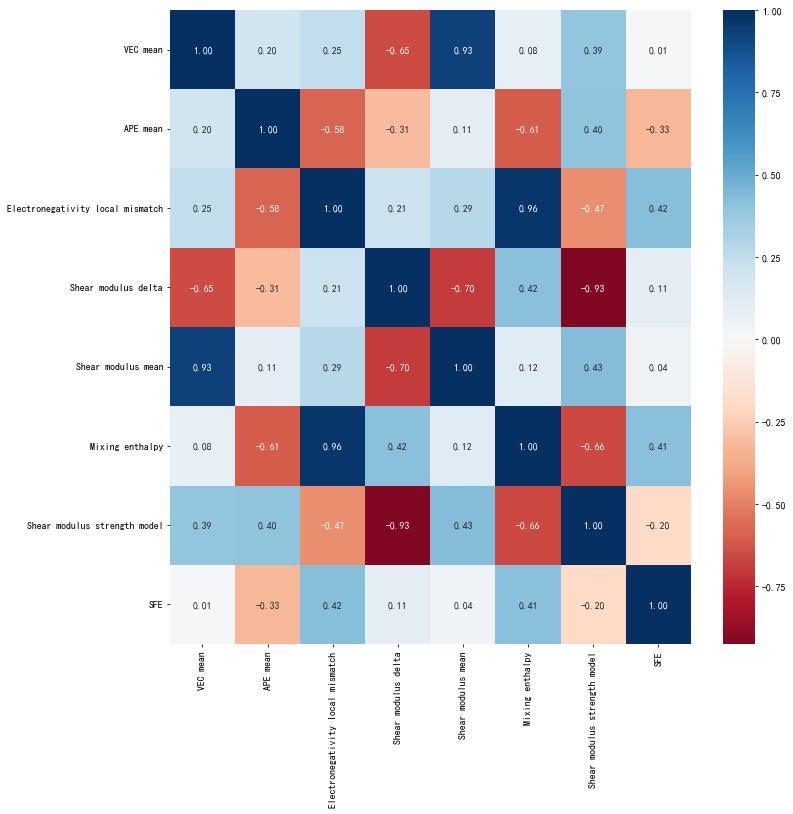

In [9]:
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(12, 12), dpi=70)
sns.heatmap(data_fit.corr(), annot=True, fmt='.2f', cmap='RdBu', xticklabels=data_fit.columns, yticklabels=data_fit.columns, center=0)
plt.show()